In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
file="college-salaries/clean_data.csv"

In [3]:
df=pd.read_csv(file, low_memory=True)

In [5]:
cost=pd.DataFrame(df[['INSTNM','TUITIONFEE_IN State',
 'TUITIONFEE_OUT State',
 'Paid Tuition per Full time student',
 'Expenditure per full time student', 'Graduate Median Debt', 'Early Career', 'School Type']])

In [6]:
cost["Avg Tuition"]=(cost["TUITIONFEE_IN State"]+cost["TUITIONFEE_OUT State"])/2

In [7]:
cost.dropna(inplace=True)
cost_df=pd.DataFrame(cost[cost["Graduate Median Debt"]!='PrivacySuppressed'])
cost_df['School Type'] = cost_df['School Type'].str.replace(r"For Sports Fans,","")
cost_df['School Type'] = cost_df['School Type'].str.replace(r"Research University,","")
cost_df['School Type'] = cost_df['School Type'].str.replace(r"Party School,","")
cost_df['School Type'] = cost_df['School Type'].str.replace(r"For Sports Fans","")
cost_df['School Type'] = cost_df['School Type'].str.replace(r", Religious","")
cost_df['School Type'] = cost_df['School Type'].str.replace(r"Liberal Arts School,","")
cost_df['School Type'] = cost_df['School Type'].str.replace(r"Business,","")
cost_df['School Type'] = cost_df['School Type'].str.replace(r"Engineering,","")
cost_df['School Type'] = cost_df['School Type'].str.replace(r"Art,","")
cost_df['School Type'] = cost_df['School Type'].str.replace(r"Research University","")
cost_df['School Type'] = cost_df['School Type'].str.replace(r"Sober School","")
cost_df['School Type'] = cost_df['School Type'].str.replace(r"School","")

cost_df.head()

,INSTNM,TUITIONFEE_IN State,TUITIONFEE_OUT State,Paid Tuition per Full time student,Expenditure per full time student,Graduate Median Debt,Early Career,School Type,Avg Tuition
0,Alabama A & M University,9366.0,17136.0,9657.0,7941.0,35000,46200,State,13251.0
1,University of Alabama at Birmingham,7766.0,17654.0,10263.0,17548.0,21500,46000,State,12710.0
2,University of Alabama in Huntsville,9128.0,20622.0,8917.0,10619.0,23500,54200,State,14875.0
3,Alabama State University,8720.0,15656.0,7717.0,7742.0,32091,38300,State,12188.0
4,The University of Alabama,10170.0,25950.0,13373.0,10312.0,23750,49000,State,18060.0


In [42]:
private=pd.DataFrame(cost_df[cost_df["School Type"].str.contains("Private")])
private=private[["Avg Tuition", "Early Career", "Graduate Median Debt"]]

public=pd.DataFrame(cost_df[cost_df["School Type"].str.contains("State")])
public=public[["Avg Tuition", "Early Career", "Graduate Median Debt"]]



In [43]:
private["Graduate Median Debt"]=private["Graduate Median Debt"].astype(float)
public["Graduate Median Debt"]=public["Graduate Median Debt"].astype(float)


In [44]:
private["Graduate Median Debt"]=private["Graduate Median Debt"].astype(int)
public["Graduate Median Debt"]=public["Graduate Median Debt"].astype(int)


In [45]:
private["Avg Tuition"]=private["Avg Tuition"].astype(int)
public["Avg Tuition"]=public["Avg Tuition"].astype(int)

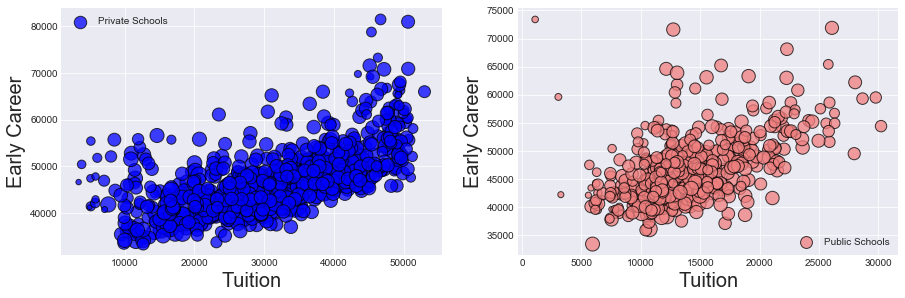

In [72]:
fig = plt.figure(figsize = (15,10))
sns.set_style("darkgrid")

plt.subplot(2, 2, 1)
plt.scatter(private["Avg Tuition"], private["Early Career"], private["Graduate Median Debt"]/150, facecolors="blue", edgecolors="black", label="Private Schools", alpha=.75)
plt.legend()
plt.xlabel("Tuition", fontsize = 20)
plt.ylabel("Early Career", fontsize = 20)

plt.subplot(2, 2, 2)
plt.scatter(public["Avg Tuition"], public["Early Career"], public["Graduate Median Debt"]/150, facecolors="lightcoral", edgecolors="black", label="Public Schools", alpha=.75)
plt.legend()
plt.xlabel("Tuition", fontsize = 20)
plt.ylabel("Early Career", fontsize = 20)
plt.show()

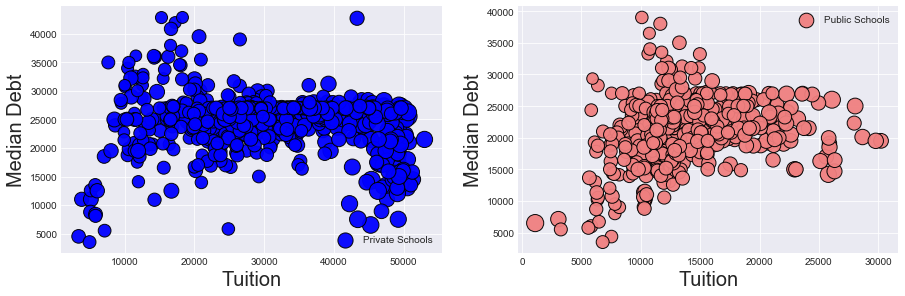

In [69]:
fig = plt.figure(figsize = (15,10))
sns.set_style("darkgrid")
plt.subplot(2, 2, 1)
plt.scatter(private["Avg Tuition"], private["Graduate Median Debt"], private["Early Career"]/250, facecolors="blue", edgecolors="black", label="Private Schools", alpha=.95)
plt.legend()
plt.xlabel("Tuition", fontsize = 20)
plt.ylabel("Median Debt", fontsize = 20)

plt.subplot(2, 2, 2)
plt.scatter(public["Avg Tuition"], public["Graduate Median Debt"], public["Early Career"]/250, facecolors="lightcoral", edgecolors="black", label="Public Schools", alpha=.95)
plt.legend()
plt.xlabel("Tuition", fontsize = 20)
plt.ylabel("Median Debt", fontsize = 20)
plt.show()

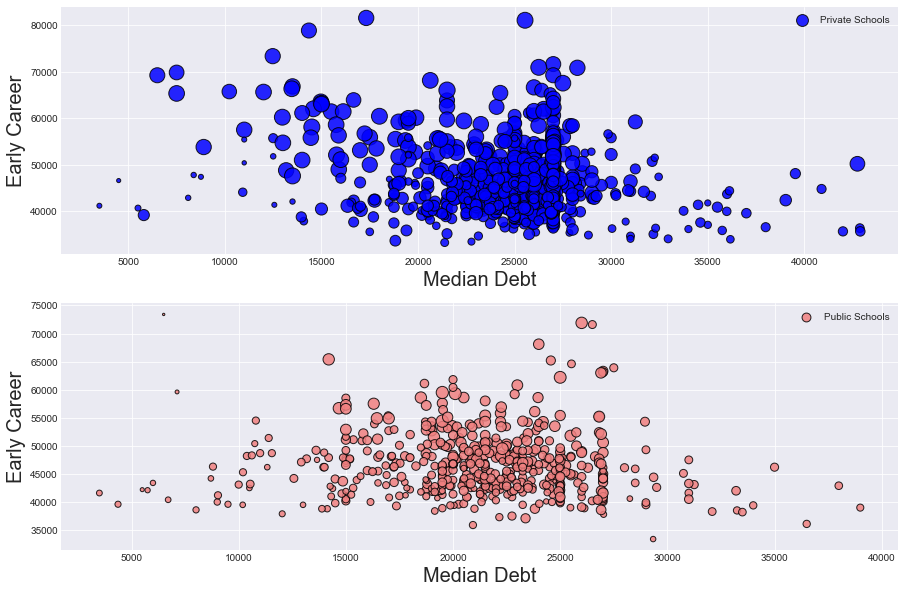

In [85]:
fig = plt.figure(figsize = (15,10))
sns.set_style("darkgrid")

plt.subplot(2, 1, 1)
plt.scatter(private["Graduate Median Debt"], private["Early Career"], private["Avg Tuition"]/200, facecolors="blue", edgecolors="black", label="Private Schools", alpha=.85)
plt.legend()
plt.xlabel("Median Debt", fontsize = 20)
plt.ylabel("Early Career", fontsize = 20)

plt.subplot(2, 1, 2)
plt.scatter( public["Graduate Median Debt"], public["Early Career"], public["Avg Tuition"]/200, facecolors="lightcoral", edgecolors="black", label="Public Schools", alpha=.85)

plt.legend()
plt.xlabel("Median Debt", fontsize = 20)
plt.ylabel("Early Career", fontsize = 20)
plt.show()

In [86]:
cost_df.head()

,INSTNM,TUITIONFEE_IN State,TUITIONFEE_OUT State,Paid Tuition per Full time student,Expenditure per full time student,Graduate Median Debt,Early Career,School Type,Avg Tuition
0,Alabama A & M University,9366.0,17136.0,9657.0,7941.0,35000,46200,State,13251.0
1,University of Alabama at Birmingham,7766.0,17654.0,10263.0,17548.0,21500,46000,State,12710.0
2,University of Alabama in Huntsville,9128.0,20622.0,8917.0,10619.0,23500,54200,State,14875.0
3,Alabama State University,8720.0,15656.0,7717.0,7742.0,32091,38300,State,12188.0
4,The University of Alabama,10170.0,25950.0,13373.0,10312.0,23750,49000,State,18060.0


In [89]:
cost_df["Graduate Median Debt"]=cost_df["Graduate Median Debt"].astype(float)

In [90]:
cost_df["Avg Tuition"]=cost_df["Avg Tuition"].astype(float)

In [98]:
cost_df["Debt-to-Income"]=(cost_df["Graduate Median Debt"]/cost_df["Early Career"])*100

In [99]:
cost_df.head()

,INSTNM,TUITIONFEE_IN State,TUITIONFEE_OUT State,Paid Tuition per Full time student,Expenditure per full time student,Graduate Median Debt,Early Career,School Type,Avg Tuition,Debt-to-Income
0,Alabama A & M University,9366.0,17136.0,9657.0,7941.0,35000.0,46200.0,State,13251.0,75.757576
1,University of Alabama at Birmingham,7766.0,17654.0,10263.0,17548.0,21500.0,46000.0,State,12710.0,46.739130
2,University of Alabama in Huntsville,9128.0,20622.0,8917.0,10619.0,23500.0,54200.0,State,14875.0,43.357934
3,Alabama State University,8720.0,15656.0,7717.0,7742.0,32091.0,38300.0,State,12188.0,83.788512
4,The University of Alabama,10170.0,25950.0,13373.0,10312.0,23750.0,49000.0,State,18060.0,48.469388


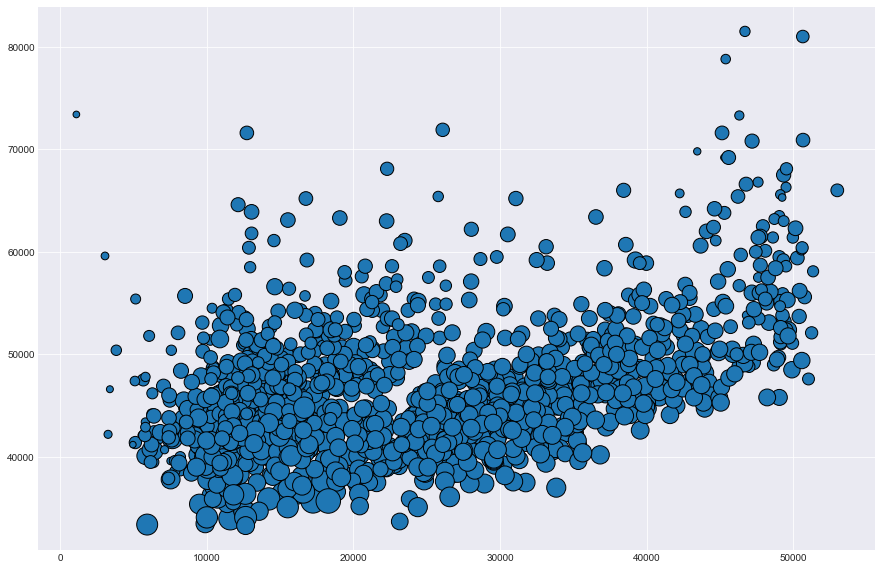

In [102]:
fig = plt.figure(figsize = (15,10))
sns.set_style("darkgrid")

cost_df["Early Career"]=cost_df["Early Career"].astype(float)
plt.scatter(cost_df["Avg Tuition"], cost_df["Early Career"], cost_df["Debt-to-Income"]*5, edgecolors="black")
plt.show()

In [103]:
print(private["Early Career"].mean())

46705.60538116592


In [104]:
print(public["Early Career"].mean())

46720.18518518518


In [105]:
print(private["Avg Tuition"].mean())
print(public["Avg Tuition"].mean())

30801.42264573991
14027.848148148149


In [109]:
print("Private in-state and out-of-state tuition")
print(round(cost_df[cost_df["School Type"].str.contains("Private")]["TUITIONFEE_IN State"].mean(),2))
print(round(cost_df[cost_df["School Type"].str.contains("Private")]["TUITIONFEE_OUT State"].mean(),2))

print("\nPublic in-state and out-of-state tuition")
print(round(cost_df[cost_df["School Type"].str.contains("State")]["TUITIONFEE_IN State"].mean(),2))
print(round(cost_df[cost_df["School Type"].str.contains("State")]["TUITIONFEE_OUT State"].mean(),2))


Private in-state and out-of-state tuition
30799.12
30803.73

Public in-state and out-of-state tuition
8553.09
19502.78


In [112]:
##Yearly tuition as a percentage of first year earnings
private["Tuition-to-Earnings"]=(private["Avg Tuition"]/private["Early Career"])*100
public["Tuition-to-Earnings"]=(cost_df[cost_df["School Type"].str.contains("State")]["TUITIONFEE_IN State"]/public["Early Career"])*100


In [113]:
print(private["Tuition-to-Earnings"].mean())
print(public["Tuition-to-Earnings"].mean())

65.25840075426298
18.258917060754747


In [114]:
print(private["Graduate Median Debt"].mean())
print(public["Graduate Median Debt"].mean())

24789.918161434976
21195.337037037036
